In [ ]:
# Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

Saving user_behavior_dataset.csv to user_behavior_dataset.csv
Null values in dataset:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


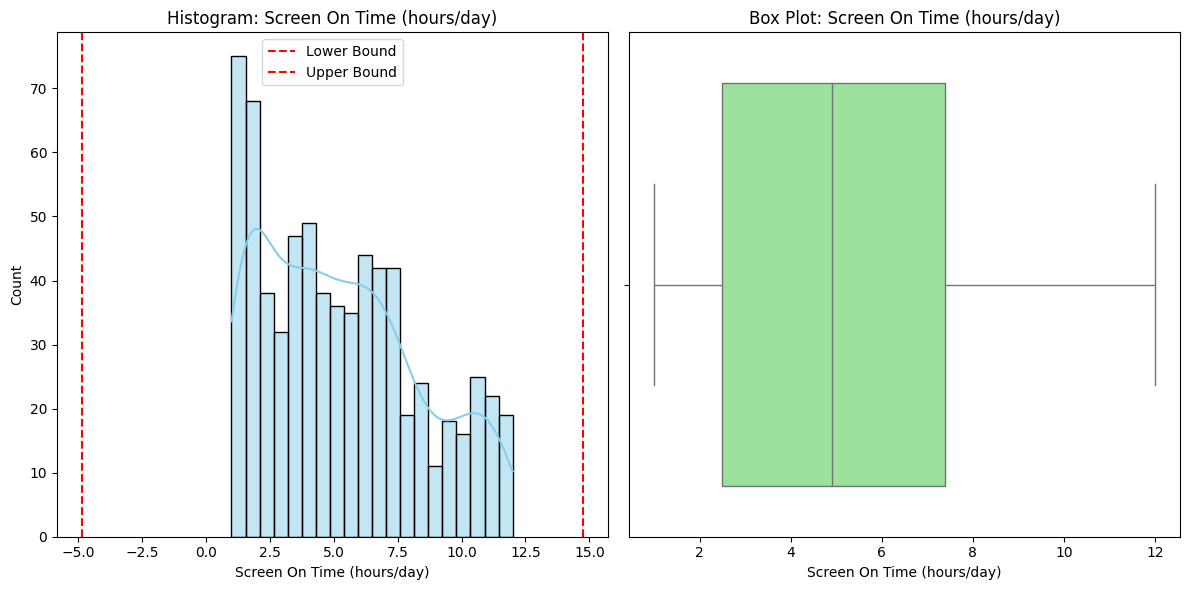

Screen On Time Analysis: {'Number of Outliers': 0, 'Outlier Values': [], 'Lower Bound': -4.8500000000000005, 'Upper Bound': 14.75}


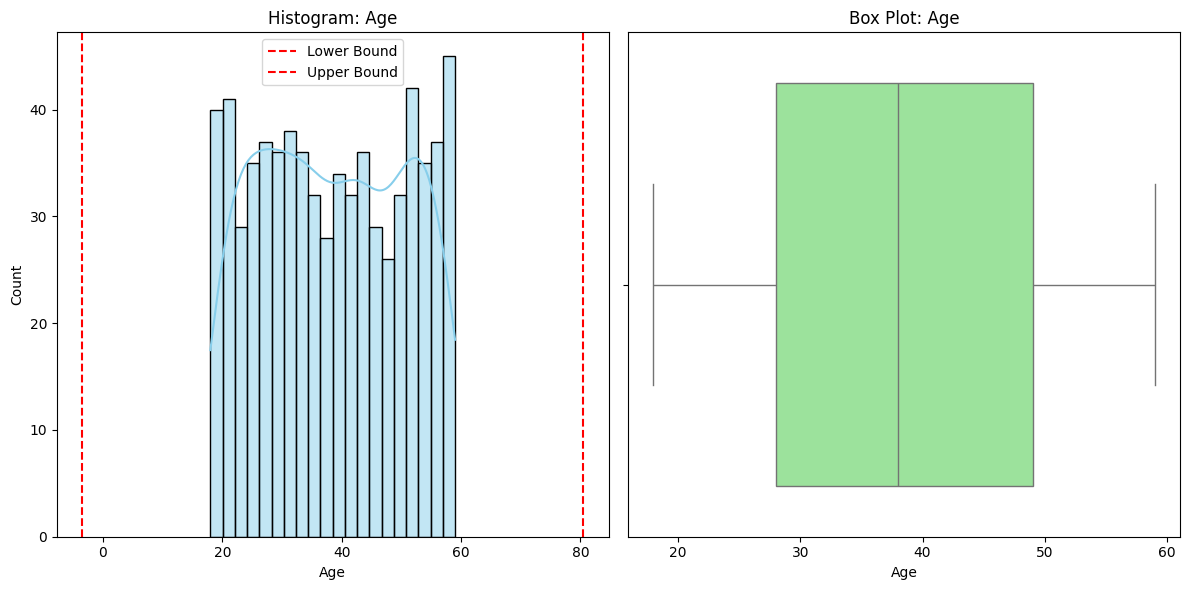

Age Analysis: {'Number of Outliers': 0, 'Outlier Values': [], 'Lower Bound': -3.5, 'Upper Bound': 80.5}


In [ ]:

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Function to visualize and analyze outliers for a column
def analyze_column(data, column):
    # Detect outliers
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data, column)

    # Plot the data distribution and box plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Histogram
    sns.histplot(data[column], bins=20, kde=True, color="skyblue", ax=ax[0])
    ax[0].axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    ax[0].axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    ax[0].set_title(f"Histogram: {column}")
    ax[0].legend()

    # Box plot
    sns.boxplot(data=data, x=column, ax=ax[1], color="lightgreen")
    ax[1].set_title(f"Box Plot: {column}")

    # Add annotation for bounds
    ax[1].annotate(f"Lower Bound: {lower_bound:.2f}", xy=(0, lower_bound), xycoords='data',
                   xytext=(0, lower_bound - 0.5), textcoords='data',
                   arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')
    ax[1].annotate(f"Upper Bound: {upper_bound:.2f}", xy=(0, upper_bound), xycoords='data',
                   xytext=(0, upper_bound + 0.5), textcoords='data',
                   arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

    plt.tight_layout()
    plt.show()

    # Return summary of outliers
    return {
        "Number of Outliers": len(outliers),
        "Outlier Values": outliers[column].tolist(),
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
    }

# File upload and data preparation
uploaded = files.upload()
df = pd.read_csv('user_behavior_dataset.csv')

# Check and clean data
print("Null values in dataset:")
print(df.isnull().sum())
df.drop_duplicates(inplace=True)

# Analyze 'Screen On Time (hours/day)'
if 'Screen On Time (hours/day)' in df.columns:
    screen_time_analysis = analyze_column(df, "Screen On Time (hours/day)")
    print("Screen On Time Analysis:", screen_time_analysis)
else:
    print("Column 'Screen On Time (hours/day)' not found in dataset.")

# Analyze 'Age'
if 'Age' in df.columns:
    age_analysis = analyze_column(df, "Age")
    print("Age Analysis:", age_analysis)
else:
    print("Column 'Age' not found in dataset.")
